# Veränderung der Wildtierpopilation










# "Living Planet index"

Gruppe: Wanda Schneid, Riccardo Reich

## Fragestellung :
- "Wie hat sich der Living Planet Index (LPI) in verschiedenen geografischen Regionen im Verlauf der Jahre verändert und welche regionalen Unterschiede sind dabei erkennbar? Was könnten Gründe sein für anfällige statistische Ausreisser?"   
### 1.3 Datenquelle(n):
- https://ourworldindata.org



### 1.4 Daten beschaffen und laden

In [56]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
# loading the data
df = pd.read_csv('global-living-planet-index.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','LPI','LPI_upper','LPI_lower']) 
df.head() 



,Gebiet,Code,Jahr,LPI,LPI_upper,LPI_lower
0,Africa,NaN,1970,100.000000,100.00000,100.000000
1,Africa,NaN,1971,94.004613,103.67786,86.478470
2,Africa,NaN,1972,89.996994,105.99841,77.636576
3,Africa,NaN,1973,89.674807,109.67456,74.525344
4,Africa,NaN,1974,85.613140,109.10656,67.872155


## 2. Daten vorbereiten 

Spaltenstruktur:

Die Spalte Jahr enthält die Zeitreihen von 1970 bis 1979 (Wide-Format für Jahre).
Die Spalte Gebiet enthält geografische Regionen wie Africa, Asia and Pacific, etc., und dient als Index.
Aktuelles Format:

Wide-Format (auch "Pivot-Format"): Jede Spalte repräsentiert ein Jahr, und die Werte in der Tabelle entsprechen den jeweiligen Messwerten (z. B. LPI-Werten) für die Regionen.
Der Index (Gebiet) ist hier bereits gruppiert.

Für Visualisierungen (z. B. Boxplots):
- Ein Long-Format (tidy data) ist sinnvoller. Hierbei wird jede Kombination aus Jahr und Gebiet in einer separaten Zeile erfasst. Dies ermöglicht eine einfache Gruppierung und die Verwendung von Plot-Bibliotheken wie Seaborn.

- Datentypen im Datensatz:

Gebiet        object

Code          object

Jahr           int64

LPI          float64

LPI_upper    float64

LPI_lower    float64

dtype: object


In [58]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='LPI')
df_pivot.head()


Jahr,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Gebiet,,,,,,,,,,,,,,,,,,,,,
Africa,100.0,94.004613,89.996994,89.674807,85.613140,79.875220,73.681283,68.556696,63.461990,61.046195,...,30.375797,29.082093,28.170413,26.960373,26.047170,25.596067,25.551108,25.256574,24.632017,23.967030
Asia and Pacific,100.0,103.670140,105.456090,106.375460,107.306080,108.420070,107.959830,106.008470,103.881300,102.263150,...,40.703940,40.625206,42.730197,45.025682,47.193745,45.737422,45.325962,43.191930,41.926342,39.603937
Europe and Central Asia,100.0,101.561760,103.288280,105.340410,107.973430,110.224510,111.411240,111.570610,111.541020,111.605480,...,81.817860,76.981880,71.378440,70.045346,68.172190,66.201930,63.673630,62.696710,63.467930,64.715004
Freshwater,100.0,99.466056,98.527170,97.939116,94.870490,90.887773,86.563830,82.577896,78.732413,75.956740,...,16.353667,15.416210,15.310742,15.783352,16.220301,16.004752,15.896590,15.773053,15.531172,14.783052
Latin America and the Caribbean,100.0,101.007160,99.456760,95.006640,89.129627,82.746035,77.167290,71.914930,68.224823,65.981640,...,8.084096,7.323765,6.918912,6.663473,6.525281,5.976160,5.590089,5.621799,5.709860,5.377315


## 3. Statistik der Rohdaten (Analyse im Long-Format)




Variable: Kontinuierlich oder diskret?
Gebiet:
Diskrete Variable, die verschiedene Regionen darstellt (z. B. Afrika, Asien).
Anzahl verschiedener Gebiete:  7
Africa                             51

Asia and Pacific                   51

Europe and Central Asia            51

Freshwater                         51

Latin America and the Caribbean    51

North America                      51

World                              51

Code:
diskrete Variable ( Regionencodes ) 
Anzahl verschiedener Codes:  2
OWID_WRL    51

Jahr:
Kontinuierliche oder quasi-kontinuierliche Zeitvariable, da sie Jahre darstellt.
Anzahl verschiedene Jahre:51
Anzahl Daten pro Jahr: 7

LPI:
Kontinuierliche Zielvariable (Living Planet Index).
Anzahl Daten: 357

LPI_upper und LPI_lower:
Kontinuierliche Variablen
Anzahl Daten: 357 



In [59]:

df.dtypes

Gebiet        object
Code          object
Jahr           int64
LPI          float64
LPI_upper    float64
LPI_lower    float64
dtype: object

In [60]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  7


In [61]:
# Anzahl Datenpunkte pro Gebiet
df['Gebiet'].value_counts()

Gebiet
Africa                             51
Asia and Pacific                   51
Europe and Central Asia            51
Freshwater                         51
Latin America and the Caribbean    51
North America                      51
World                              51
Name: count, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

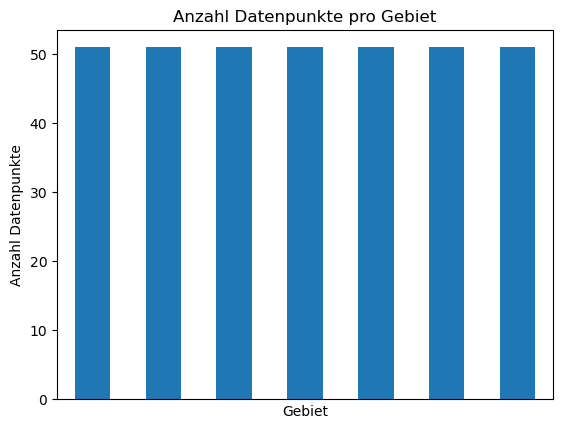

In [62]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

In [63]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  2


In [64]:
# Anzahl Datenpunkte pro Gebiet
df['Code'].value_counts()

Code
OWID_WRL    51
Name: count, dtype: int64

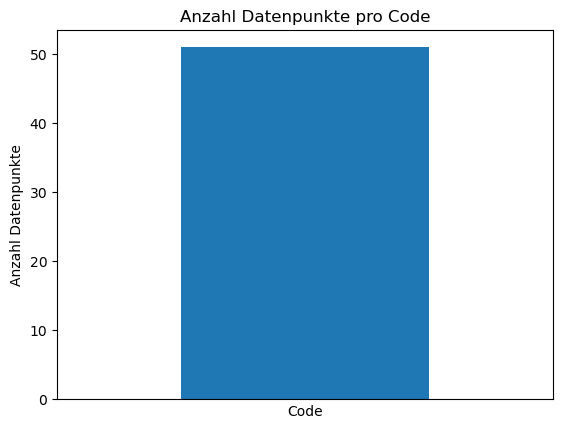

In [65]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

In [66]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  51


In [67]:
# Anzahl Datenpunkte pro Jahr
df['Jahr'].value_counts().sort_index()

Jahr
1970    7
1971    7
1972    7
1973    7
1974    7
1975    7
1976    7
1977    7
1978    7
1979    7
1980    7
1981    7
1982    7
1983    7
1984    7
1985    7
1986    7
1987    7
1988    7
1989    7
1990    7
1991    7
1992    7
1993    7
1994    7
1995    7
1996    7
1997    7
1998    7
1999    7
2000    7
2001    7
2002    7
2003    7
2004    7
2005    7
2006    7
2007    7
2008    7
2009    7
2010    7
2011    7
2012    7
2013    7
2014    7
2015    7
2016    7
2017    7
2018    7
2019    7
2020    7
Name: count, dtype: int64

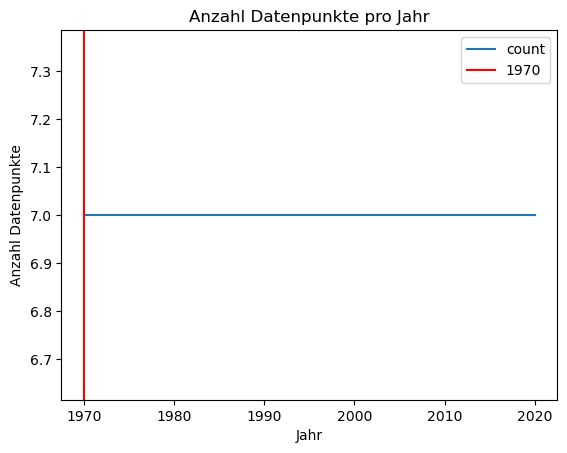

In [68]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=1970, color='red',label='1970') # rote Linie bei 1970 - ab hier sind alle Jahre enthalten
g.legend()  # Legende anzeigen

In [69]:
df.describe()


,Jahr,LPI,LPI_upper,LPI_lower
count,357.000000,357.000000,357.000000,357.000000
mean,1995.000000,62.852547,80.038822,50.874899
std,14.740261,30.835893,32.728130,29.994732
min,1970.000000,5.377315,9.517395,2.832950
25%,1982.000000,37.214458,55.269647,23.687129
50%,1995.000000,63.837220,87.592334,48.693627
75%,2008.000000,89.896840,105.411270,76.082350
max,2020.000000,128.223780,147.943120,110.602660


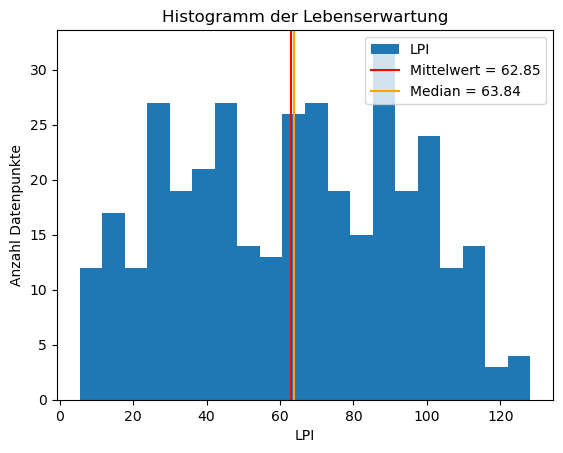

In [70]:
g = df['LPI'].plot(kind='hist', bins=20, title='Histogramm der Lebenserwartung', 
                           xlabel='LPI', ylabel='Anzahl Datenpunkte')
mean = df['LPI'].mean()
g.axvline(x=df['LPI'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['LPI'].median()
g.axvline(x=df['LPI'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

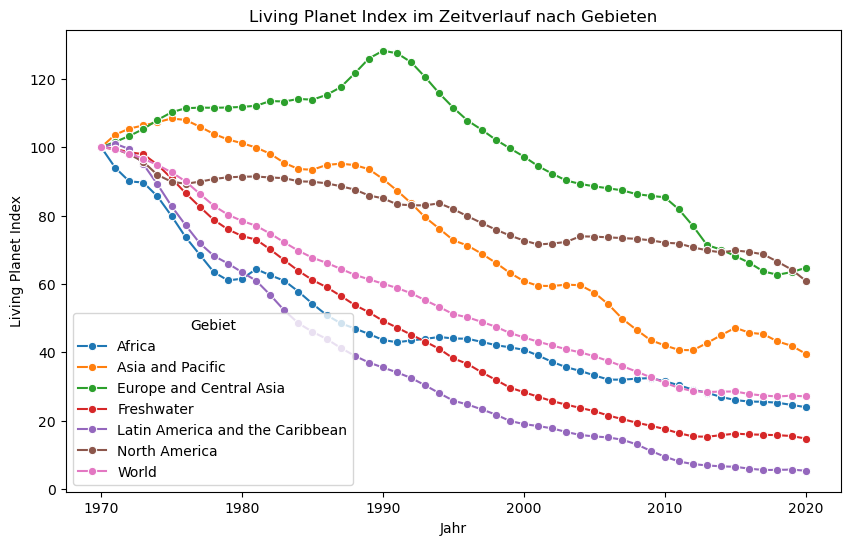

In [71]:
# Visualisierung des LPI im Zeitverlauf für jede Region
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Jahr', y='LPI', hue='Gebiet', marker='o')
plt.title('Living Planet Index im Zeitverlauf nach Gebieten')
plt.xlabel('Jahr')
plt.ylabel('Living Planet Index')
plt.legend(title='Gebiet')
plt.show()

## 4. Analyse 




Wie hat sich der Living Planet Index (LPI) in verschiedenen geografischen Regionen im Verlauf der Jahre verändert und welche regionalen Unterschiede sind dabei erkennbar? Was könnten Gründe sein für anfällige statistische Ausreisser?" 

Im grossen und ganzen sieht man deutlich eine Abnahme der Wildtier-Population.

Regionale Unterschiede in der Entwicklung:
Lateinamerika und Karibik: Zeigt den größten Rückgang und die stärksten Schwankungen. Besonders nach 2010 sind große Ausreißer erkennbar, die auf deutliche Populationseinbrüche hindeuten. 

Afrika und Asien-Pazifik: Zeigen im Durchschnitt ebenfalls einen negativen Trend, aber mit moderateren Schwankungen im Vergleich zu Lateinamerika.

Europa und Zentralasien sowie Nordamerika: Hier sind die Schwankungen relativ gering. Der LPI scheint in diesen Regionen stabiler zu sein, wenn auch nicht frei von Rückgängen.

Global (Welt): Der weltweite Durchschnitt zeigt einen klaren negativen Trend, spiegelt jedoch die Durchschnittswerte aller Regionen wider.

Frischwasserlebensräume: Auffällig ist, dass auch in diesen Ökosystemen ein deutlicher Rückgang erkennbar ist, vergleichbar mit den terrestrischen Regionen.

Gründe für statistische Ausreißer:

Datenqualität: Fehlende oder lückenhafte Datenerhebung in bestimmten Regionen kann zu statistischen Sprüngen führen.

Natürliche Ereignisse: Katastrophen wie Dürren, Überschwemmungen oder andere Naturkatastrophen könnten kurzfristig extreme Rückgänge in Populationen erklären.

Menschliche Einflüsse: Entwaldung, Überfischung, Habitatverlust und Urbanisierung können lokal dramatische Effekte haben, wie sie in der Grafik sichtbar werden.

Methodische Unterschiede: 
Änderungen in der Methodik zur Berechnung des LPI oder ungleiche Stichprobengrößen zwischen den Regionen könnten statistische Ausreißer hervorrufen.

Die drastischen Schwankungen in Lateinamerika und Karibik könnten zudem mit massiver Entwaldung im Amazonasgebiet, illegaler Wilderei oder der starken Zunahme von Infrastrukturprojekten in ökologisch sensiblen Gebieten zusammenhängen. In Europa und Nordamerika könnten bessere Schutzmaßnahmen und strengere Regularien für mehr Stabilität im LPI gesorgt haben.
hat Kontextmenü

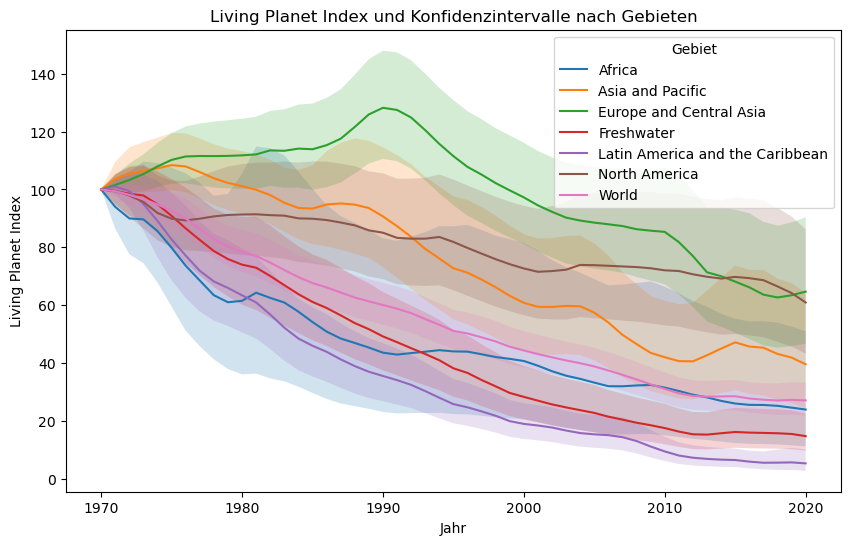

In [72]:
plt.figure(figsize=(10, 6))
for region in df['Gebiet'].unique():
    region_data = df[df['Gebiet'] == region]
    plt.plot(region_data['Jahr'], region_data['LPI'], label=region)
    plt.fill_between(region_data['Jahr'], region_data['LPI_lower'], region_data['LPI_upper'], alpha=0.2)
    
plt.title('Living Planet Index und Konfidenzintervalle nach Gebieten')
plt.xlabel('Jahr')
plt.ylabel('Living Planet Index')
plt.legend(title='Gebiet')
plt.show()

In [73]:
# Berechnung der Korrelation zwischen LPI und Jahr für jede Region
correlations = df.groupby('Gebiet').apply(lambda group: group['LPI'].corr(group['Jahr']))
print('Korrelation zwischen LPI und Jahr für jede Region:')
print(correlations)

Korrelation zwischen LPI und Jahr für jede Region:
Gebiet
Africa                            -0.938519
Asia and Pacific                  -0.975255
Europe and Central Asia           -0.792497
Freshwater                        -0.969844
Latin America and the Caribbean   -0.948097
North America                     -0.974030
World                             -0.984341
dtype: float64


C:\Users\ricca\AppData\Local\Temp\ipykernel_13768\1872267184.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df.groupby('Gebiet').apply(lambda group: group['LPI'].corr(group['Jahr']))


In [74]:
# Berechnung der prozentualen Veränderung des LPI im Zeitverlauf
df['LPI_change'] = df.groupby('Gebiet')['LPI'].pct_change() * 100

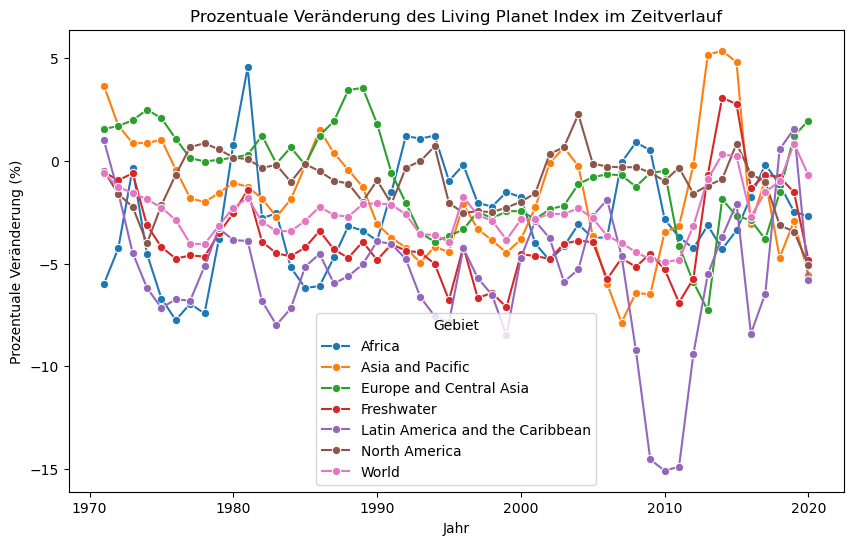

In [75]:
# Visualisierung der prozentualen Veränderung des LPI im Zeitverlauf
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Jahr', y='LPI_change', hue='Gebiet', marker='o')
plt.title('Prozentuale Veränderung des Living Planet Index im Zeitverlauf')
plt.xlabel('Jahr')
plt.ylabel('Prozentuale Veränderung (%)')
plt.legend(title='Gebiet')
plt.show()


C:\Users\ricca\AppData\Local\Temp\ipykernel_13768\3629412834.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gebiet', y='LPI', data=df, showfliers=False, palette="pastel")


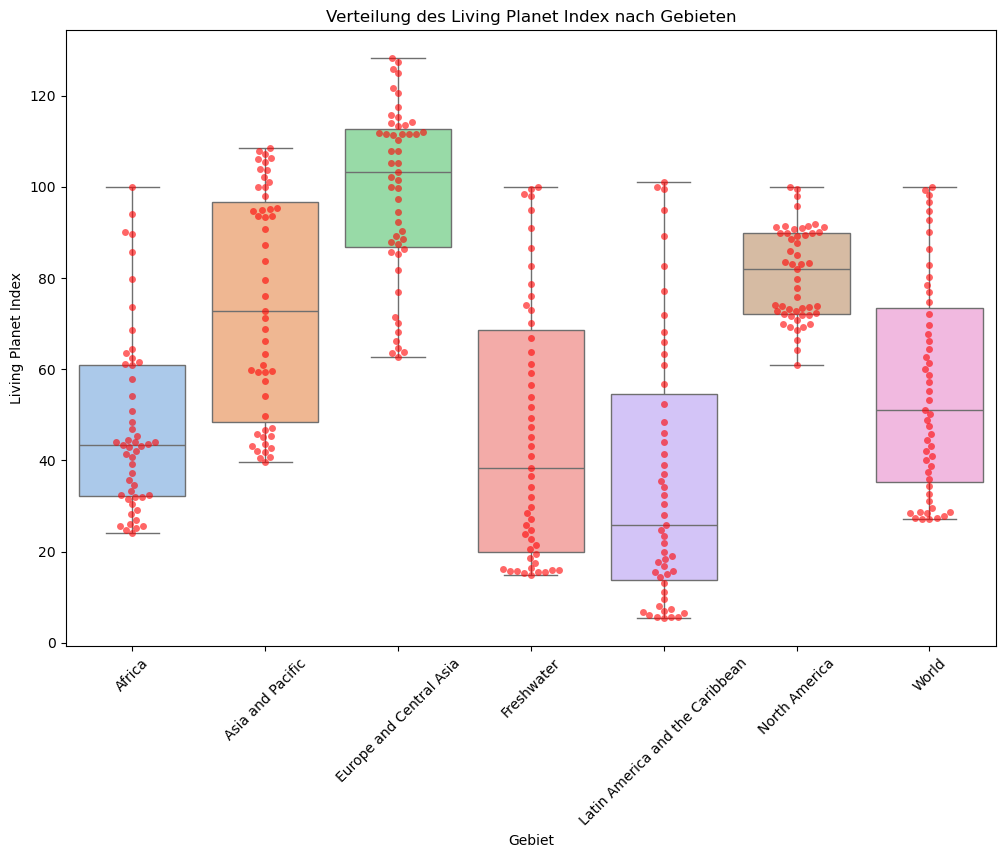

In [79]:
plt.figure(figsize=(12, 8))

# Boxplot ohne Ausreißer
sns.boxplot(x='Gebiet', y='LPI', data=df, showfliers=False, palette="pastel")

# Swarmplot für Ausreißer
sns.swarmplot(x='Gebiet', y='LPI', data=df, color='red', alpha=0.6)

plt.title('Verteilung des Living Planet Index nach Gebieten')
plt.xlabel('Gebiet')
plt.ylabel('Living Planet Index')
plt.xticks(rotation=45)

plt.show()
